![example](images\movie2.jpg)

# Microsoft Movie Analysis

**Author:** Sylvester Magunda
***

## Overview

This project uses EDA to generate insights for Microsoft, which wants to start a new movie studio. Based on the data from Box Office Mojo and IMDB, recommendations are made on what Microsoft should consider before creating the studio. This model uses metrics such as worldwide gross income over years, number of movies in specific language, genre_ids with most movies, and average vote to help Microsoft come up with informed decisions. Generally, the findings show that Microsoft should produce movies in English. Results show that worldwide gross income has been increasing since 2015.

## Business Problem

Microsoft, realizing the proliferation of original video content production among leading companies, has decided to start a movie studio. However, they hardly have any information about movie production. This project explores the data present to identify significant details that will help Microsoft come up with informed decisions while creating the new studio.

This analysis responds to the following questions:
* What are the number of movies per original language?
* What is the relationship between production budget and profits?
* What is the average rating per original language?
* How has worldwide gross income been changing over years?
* What is the relationship between original language and vote average?

## Data Understanding

This project is based on data from Box Office Mojo and IMDB to get an idea of the best performing movies. The data used represent information of different movies using columns such as original_language, title, genre_ids, wordwide_gross, vote_average, and production_budget which are all important in coming up with informed decisions on movie production.

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Here you run your code to explore the data
movie_budgets_df = pd.read_csv(r"zippedData/tn.movie_budgets.csv.gz") #To load and open our dataset
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
tmdb_movies_df = pd.read_csv(r"zippedData/tmdb.movies.csv.gz") #Import the second dataset
tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [6]:
bom_movie_gross_df = pd.read_csv(r"zippedData/bom.movie_gross.csv.gz") #Import the third dataset
bom_movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
#Join tmdb.movies.csv.gz and bom.movie_gross.csv on column title
merged_df = pd.merge(tmdb_movies_df, bom_movie_gross_df, on="title")
merged_df 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,25090,"[16, 10751, 12]",455842,en,Elliot: The Littlest Reindeer,2.903,2018-11-30,Elliot: The Littlest Reindeer,3.4,7,Scre.,24300.0,NaN,2018
2699,25148,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000,2018
2700,25189,[35],498919,es,La Boda de Valentina,2.550,2018-02-09,La Boda de Valentina,6.3,7,PNT,2800000.0,NaN,2018
2701,25307,[18],470641,hi,मुक्काबाज़,2.276,2018-01-12,Mukkabaaz,7.5,18,Eros,75900.0,NaN,2018


In [8]:
#Join the merged dataframe with tn.movie_budgets.csv using columns "title" and "movie"respectively
df = pd.merge(merged_df, movie_budgets_df, left_on="title", right_on="movie")
df 

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010,50,"Jul 9, 2010",Despicable Me,"$69,000,000","$251,513,985","$543,464,573"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.576,2018-02-09,The 15:17 to Paris,5.3,799,WB,36300000.0,20800000,2018,23,"Feb 9, 2018",The 15:17 to Paris,"$30,000,000","$36,276,286","$56,096,200"
1391,24120,[35],474335,en,Uncle Drew,10.836,2018-06-29,Uncle Drew,6.5,220,LG/S,42500000.0,4200000,2018,85,"Jun 29, 2018",Uncle Drew,"$18,000,000","$42,469,946","$46,527,161"
1392,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1393,24212,"[53, 28, 80]",442064,en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,SGem,20900000.0,876000,2018,50,"Jan 12, 2018",Proud Mary,"$30,000,000","$20,868,638","$21,709,539"


### Exploring the Merged Data
After joining the three dataframes, we got the final dataframe to be explored before cleaning it

In [7]:
#To show the top 5 records of the dataset
df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010,50,"Jul 9, 2010",Despicable Me,"$69,000,000","$251,513,985","$543,464,573"


In [80]:
#To show the bottom 5 records of the dataframe
df.tail()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
1390,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.576,2018-02-09,The 15:17 to Paris,5.3,799,WB,36300000.0,20800000,2018,23,"Feb 9, 2018",The 15:17 to Paris,"$30,000,000","$36,276,286","$56,096,200"
1391,24120,[35],474335,en,Uncle Drew,10.836,2018-06-29,Uncle Drew,6.5,220,LG/S,42500000.0,4200000,2018,85,"Jun 29, 2018",Uncle Drew,"$18,000,000","$42,469,946","$46,527,161"
1392,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1393,24212,"[53, 28, 80]",442064,en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,SGem,20900000.0,876000,2018,50,"Jan 12, 2018",Proud Mary,"$30,000,000","$20,868,638","$21,709,539"
1394,25148,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"


In [8]:
#To show the number of rows and columns in the dataframe
df.shape

(1395, 20)

In [9]:
#To show the number of total elements or values of the dataset
df.size

27900

In [10]:
#To show the column names
df.columns

Index(['Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'title',
       'vote_average', 'vote_count', 'studio', 'domestic_gross_x',
       'foreign_gross', 'year', 'id_y', 'release_date_y', 'movie',
       'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [11]:
#Checks the data type of each column
df.dtypes

Unnamed: 0             int64
genre_ids             object
id_x                   int64
original_language     object
original_title        object
popularity           float64
release_date_x        object
title                 object
vote_average         float64
vote_count             int64
studio                object
domestic_gross_x     float64
foreign_gross         object
year                   int64
id_y                   int64
release_date_y        object
movie                 object
production_budget     object
domestic_gross_y      object
worldwide_gross       object
dtype: object

In [85]:
#To get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1395 non-null   int64  
 1   genre_ids          1395 non-null   object 
 2   id_x               1395 non-null   int64  
 3   original_language  1395 non-null   object 
 4   original_title     1395 non-null   object 
 5   popularity         1395 non-null   float64
 6   release_date_x     1395 non-null   object 
 7   title              1395 non-null   object 
 8   vote_average       1395 non-null   float64
 9   vote_count         1395 non-null   int64  
 10  studio             1394 non-null   object 
 11  domestic_gross_x   1393 non-null   float64
 12  foreign_gross      1200 non-null   object 
 13  year               1395 non-null   int64  
 14  id_y               1395 non-null   int64  
 15  release_date_y     1395 non-null   object 
 16  movie              1395 

In [12]:
#To get a statistical summary of the dataset
df.describe()

,Unnamed: 0,id_x,popularity,vote_average,vote_count,domestic_gross_x,year,id_y
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1.393000e+03,1395.000000,1395.000000
mean,11177.741219,195389.282437,13.031513,6.390681,2277.665233,6.286766e+07,2013.808602,51.194265
std,7692.326805,137959.504090,8.038919,0.926820,2930.586211,8.849700e+07,2.511937,28.378518
min,1.000000,1771.000000,0.600000,0.000000,1.000000,8.000000e+02,2010.000000,1.000000
25%,4793.500000,63523.500000,8.448000,5.900000,409.500000,7.600000e+06,2012.000000,27.000000
50%,11096.000000,171274.000000,11.369000,6.400000,1194.000000,3.410000e+07,2014.000000,51.000000
75%,17526.500000,313645.500000,15.974000,7.000000,2912.000000,7.720000e+07,2016.000000,75.000000
max,26506.000000,561861.000000,80.773000,10.000000,22186.000000,7.001000e+08,2018.000000,100.000000


## Data Preparation

To prepare my data, I dropped the duplicated and unnecessary columns to remain with only the columns I needed for my analysis. I also dropped duplicate records and dropped rows with null values. Columns with wrong datatypes were also converted to the correct ones.

In [10]:
#Drop duplicated and unnecessary columns
df.drop(columns = ["Unnamed: 0", "id_x", "original_title","release_date_x","domestic_gross_x", "foreign_gross", "id_y", "release_date_y", "movie","domestic_gross_y"  ], axis = 1, inplace = True)
df.head(2)

,genre_ids,original_language,popularity,title,vote_average,vote_count,studio,year,production_budget,worldwide_gross
0,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610,P/DW,2010,"$165,000,000","$494,870,992"
1,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368,Par.,2010,"$170,000,000","$621,156,389"


In [14]:
#To check the shape of the data again before dropping duplicates
df.shape

(1395, 10)

In [11]:
#To check for duplicate records
df[df.duplicated()]

,genre_ids,original_language,popularity,title,vote_average,vote_count,studio,year,production_budget,worldwide_gross
110,"[18, 10749]",en,8.994,Blue Valentine,6.9,1677,Wein.,2010,"$1,000,000","$16,566,240"
126,"[35, 18, 14, 27, 9648]",en,8.319,Rubber,5.9,417,Magn.,2011,"$500,000","$680,914"
166,[35],en,5.762,High School,5.8,68,Anch.,2012,"$10,000,000","$248,133"
215,"[27, 35, 53]",en,15.336,The Cabin in the Woods,6.5,4185,LGF,2012,"$30,000,000","$70,689,968"
242,"[18, 53, 28, 12]",en,12.942,The Grey,6.5,2280,ORF,2012,"$25,000,000","$81,249,176"
...,...,...,...,...,...,...,...,...,...,...
1277,[18],en,12.688,"Roman J. Israel, Esq.",6.2,499,Sony,2017,"$22,000,000","$12,967,012"
1279,[35],en,12.450,Father Figures,5.8,277,WB,2017,"$25,000,000","$21,038,441"
1287,"[35, 18, 878]",en,10.682,Downsizing,5.1,1887,Par.,2017,"$68,000,000","$54,462,971"
1297,"[18, 12]",en,9.307,Lean on Pete,6.9,133,A24,2018,"$8,000,000","$2,455,027"


In [12]:
#Drop the duplicate records
df.drop_duplicates(inplace=True)

In [17]:
#Confirm there is no duplicate record remaining
df[df.duplicated()]

,genre_ids,original_language,popularity,title,vote_average,vote_count,studio,year,production_budget,worldwide_gross


In [18]:
#Confirm duplicates using the "title" column
df[df.duplicated(keep=False, subset="title")].sort_values(by="title")

,genre_ids,original_language,popularity,title,vote_average,vote_count,studio,year,production_budget,worldwide_gross
365,[18],en,5.885,A Better Life,7.1,97,Sum.,2011,"$10,000,000","$1,884,251"
366,[99],en,0.600,A Better Life,10.0,1,Sum.,2011,"$10,000,000","$1,884,251"
716,"[53, 10749, 12]",en,16.786,Adrift,6.7,1264,STX,2018,"$35,000,000","$57,897,191"
715,[99],en,0.600,Adrift,7.0,1,STX,2018,"$35,000,000","$57,897,191"
1027,"[12, 18]",en,24.536,Alpha,5.9,1167,Studio 8,2018,"$51,000,000","$99,624,873"
...,...,...,...,...,...,...,...,...,...,...
191,"[35, 12, 14]",en,12.254,Your Highness,5.3,735,Uni.,2011,"$50,000,000","$26,121,638"
190,"[14, 18, 28, 35, 878]",en,0.600,Your Highness,3.0,4,Uni.,2011,"$50,000,000","$26,121,638"
709,[18],he,1.008,Youth,5.3,9,FoxS,2015,"$13,000,000","$24,001,573"
710,"[35, 18]",it,9.265,Youth,6.9,1098,FoxS,2015,"$13,000,000","$24,001,573"


They are not duplicates because only the values of the "title" column are the same

In [19]:
#To check where null values exist
df.isnull()

,genre_ids,original_language,popularity,title,vote_average,vote_count,studio,year,production_budget,worldwide_gross
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1390,False,False,False,False,False,False,False,False,False,False
1391,False,False,False,False,False,False,False,False,False,False
1392,False,False,False,False,False,False,False,False,False,False
1393,False,False,False,False,False,False,False,False,False,False


In [20]:
#To check the count of null values in each column
df.isnull().sum()

genre_ids            0
original_language    0
popularity           0
title                0
vote_average         0
vote_count           0
studio               1
year                 0
production_budget    0
worldwide_gross      0
dtype: int64

<AxesSubplot:>

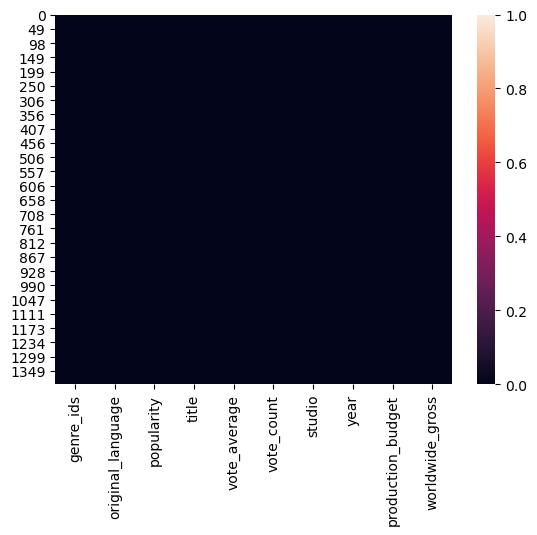

In [21]:
#Use of heatmap to display null values count
sns.heatmap(df.isnull())

From the heatmap, it is clear that there is hardly no null values because it is all black. Therefore, dropping the null values will not have a significant effect on the dataset and its analysis

In [13]:
#To drop rows with null values
df.dropna(axis=0, inplace=True)

In [23]:
#Confirm the row has been dropped
df.isnull().sum()

genre_ids            0
original_language    0
popularity           0
title                0
vote_average         0
vote_count           0
studio               0
year                 0
production_budget    0
worldwide_gross      0
dtype: int64

In [24]:
#Check each column types before changing them to appropriate data types
df.dtypes

genre_ids             object
original_language     object
popularity           float64
title                 object
vote_average         float64
vote_count             int64
studio                object
year                   int64
production_budget     object
worldwide_gross       object
dtype: object

The columns "year", "production_budget", and "worldwide_gross" have wrong datatypes. So, we have to change them to the correct data types before proceeding

In [14]:
#Convert data type of "production_budget" column from object to float
df["production_budget"] = df["production_budget"].str.replace("[\$,]", "", regex=True).astype(float)
df

,genre_ids,original_language,popularity,title,vote_average,vote_count,studio,year,production_budget,worldwide_gross
0,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610,P/DW,2010,165000000.0,"$494,870,992"
1,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368,Par.,2010,170000000.0,"$621,156,389"
2,"[28, 878, 12]",en,27.920,Inception,8.3,22186,WB,2010,160000000.0,"$835,524,642"
3,"[16, 10751, 35]",en,24.445,Toy Story 3,7.7,8340,BV,2010,200000000.0,"$1,068,879,522"
4,"[16, 10751, 35]",en,23.673,Despicable Me,7.2,10057,Uni.,2010,69000000.0,"$543,464,573"
...,...,...,...,...,...,...,...,...,...,...
1390,"[18, 36, 53]",en,11.576,The 15:17 to Paris,5.3,799,WB,2018,30000000.0,"$56,096,200"
1391,[35],en,10.836,Uncle Drew,6.5,220,LG/S,2018,18000000.0,"$46,527,161"
1392,"[80, 18, 36, 53]",en,10.034,Gotti,5.2,231,VE,2018,10000000.0,"$6,089,100"
1393,"[53, 28, 80]",en,9.371,Proud Mary,5.5,259,SGem,2018,30000000.0,"$21,709,539"


In [15]:
#Convert data type of "worldwide_gross" column from object to float
df["worldwide_gross"] = df["worldwide_gross"].str.replace("[\$,]", "", regex=True).astype(float)

## Data Modeling
To model my data, I mostly used value_counts and grouped some columns. I also used box-plot to check for ouliers and scatter plots to analyze relationship between columns.

In [28]:
#To show the number of movies produced in specific languages
df["original_language"].value_counts()

en    1221
fr      10
hi       7
es       4
ru       4
ko       3
zh       2
ar       2
th       2
it       2
pt       1
he       1
te       1
xx       1
tr       1
el       1
hu       1
pl       1
sv       1
no       1
fa       1
da       1
de       1
Name: original_language, dtype: int64

<AxesSubplot:>

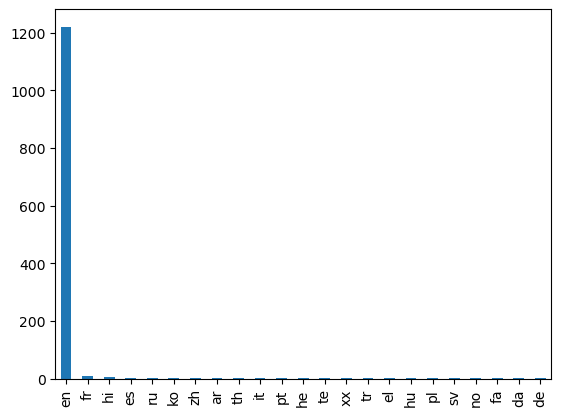

In [29]:
#Countplot to show the number of movies produced in specific languages
df["original_language"].value_counts().plot(kind="bar")

Most movies are produced in English language

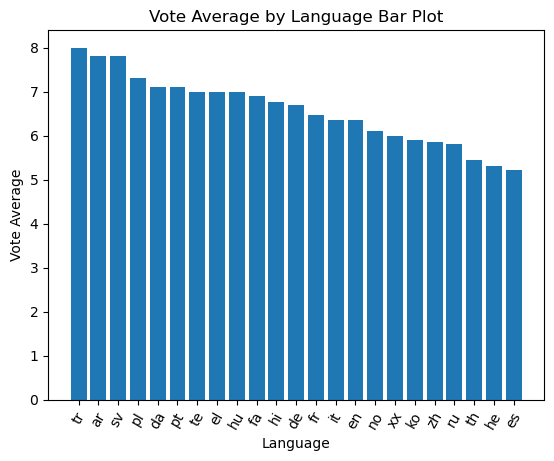

In [46]:
#Checking the most rated languages
# Calculate the vote_average for each language
language_vote = df.groupby("original_language")["vote_average"].mean()

# Sort the language vote_average in descending order
language_vote = language_vote.sort_values(ascending=False)

# Plot the bar plot
plt.bar(language_vote.index, language_vote.values)

# Add labels to the x and y axes
plt.xlabel("Language")
plt.ylabel("Vote Average")

# Add a title to the plot
plt.title("Vote Average by Language Bar Plot")
plt.xticks(rotation=60)

# Show the plot
plt.show()

This shows that language does not necessarily determine how someone will rate a movie. Other factors such as genre and studio might have an impact on vote_average

In [30]:
#To find the top 10 studios in movie production
df["studio"].value_counts().head(10)

Uni.       136
Fox        113
WB         105
BV          76
Par.        76
Sony        71
LGF         57
FoxS        52
Wein.       40
WB (NL)     39
Name: studio, dtype: int64

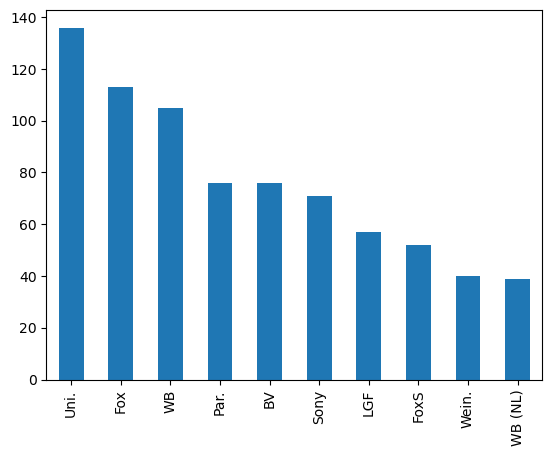

In [18]:
#Countplot to show the top 10 studios in movie production

df["studio"].value_counts().head(10).plot(kind="bar")
plt.savefig("./images/top10studios.png", dpi=300)

In [32]:
#To show top 5 genres 
df["genre_ids"].value_counts().head()

[18]           105
[35]            75
[35, 18]        36
[18, 10749]     33
[27, 53]        28
Name: genre_ids, dtype: int64

<AxesSubplot:>

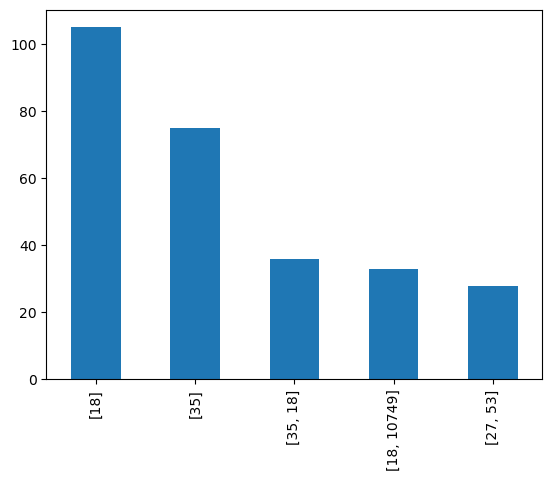

In [33]:
#Countplot of top 5 "genres_ids" value count
df["genre_ids"].value_counts().head().plot(kind="bar")

At this point, I discovered my data missed the genres column. However it is important to note that most movies produced are for genre_id "[18]"

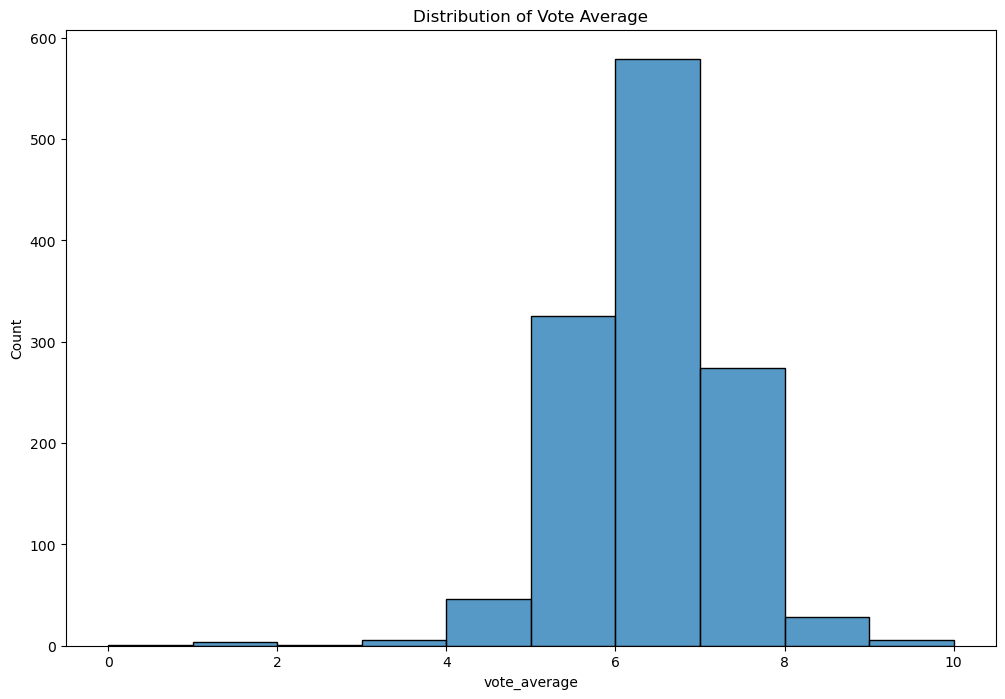

In [37]:
#Histogram displaying the "vote_average" distribution
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df["vote_average"], bins= 10, ax=ax)
ax.set_title("Distribution of Vote Average");

From this histogram, it is important to note that most movies are averagely voted at around 6.5 and the distribution is negatively skewed because it has some movies rated below 4.

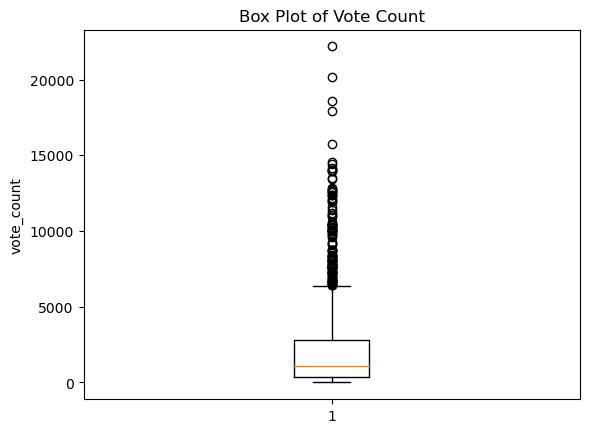

In [39]:
#Plot a boxplot of the "vote_count" column
#Access the data to be plotted
data = df["vote_count"]

# Plot the box plot
plt.boxplot(data)

# Add a title to the plot
plt.title("Box Plot of Vote Count")

# Add a label to the y-axis
plt.ylabel("vote_count")

# Show the plot
plt.show()

The "vote_count" column has some outliers

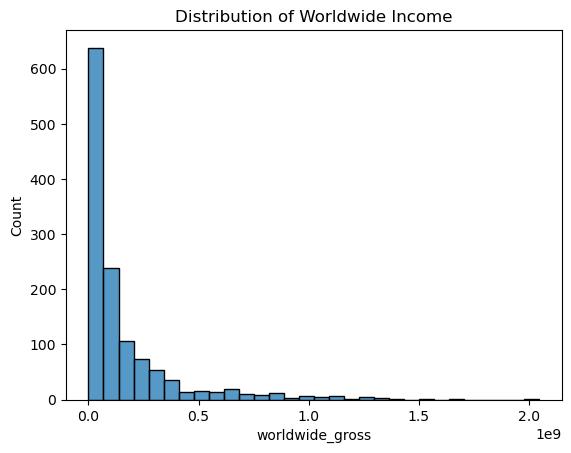

In [40]:
#Histogram showing the distribution of worldwide income
ax=sns.histplot(data=df, x=("worldwide_gross"), bins=30)
ax.set_title("Distribution of Worldwide Income");

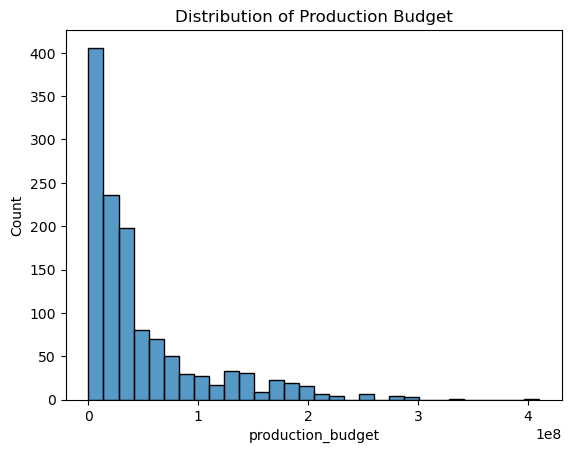

In [41]:
#Histogram showing the distribution of production budget
ax=sns.histplot(data=df, x=("production_budget"), bins=30)
ax.set_title("Distribution of Production Budget");

These two histograms showed the need of introducing a new column for profits. This column will help to investigate the relationship between production_budget and profits.

In [42]:
#Create a new column for profits
df["profits"] = df["worldwide_gross"] - df["production_budget"]
#To check the top 5 records
df.head() 

,genre_ids,original_language,popularity,title,vote_average,vote_count,studio,year,production_budget,worldwide_gross,profits
0,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610,P/DW,2010,165000000.0,4.948710e+08,329870992.0
1,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368,Par.,2010,170000000.0,6.211564e+08,451156389.0
2,"[28, 878, 12]",en,27.920,Inception,8.3,22186,WB,2010,160000000.0,8.355246e+08,675524642.0
3,"[16, 10751, 35]",en,24.445,Toy Story 3,7.7,8340,BV,2010,200000000.0,1.068880e+09,868879522.0
4,"[16, 10751, 35]",en,23.673,Despicable Me,7.2,10057,Uni.,2010,69000000.0,5.434646e+08,474464573.0


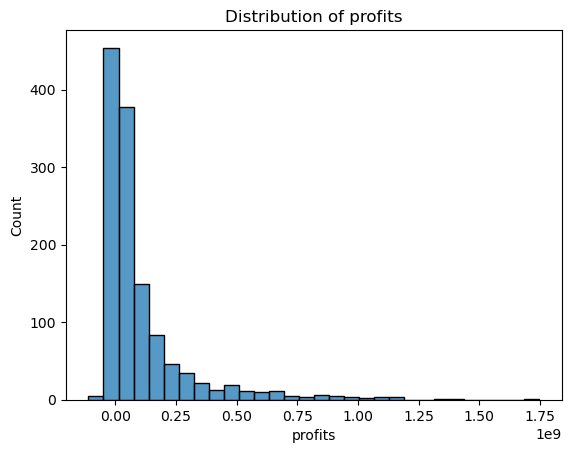

In [43]:
#Histogram showing the distribution of profits
ax=sns.histplot(data=df, x=("profits"), bins=30)
ax.set_title("Distribution of profits");

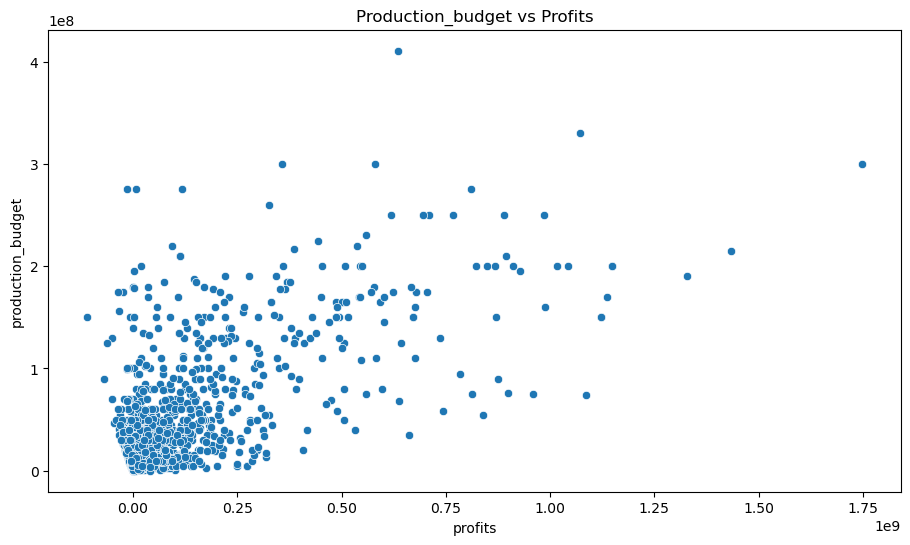

In [44]:
#To investigate relationship between production budget and profits
#Scatter plot showing  production budget vs profits
fig, ax =plt.subplots(figsize=(11,6))
sns.scatterplot(x=df["profits"], y=df["production_budget"], ax=ax)
ax.set_title("Production_budget vs Profits")
ax.set_ylabel("production_budget")
ax.set_xlabel("profits");

There is a positive linear relationship between profits and production budget. Therefore, chances of getting high profits when investing in the right movie are high.

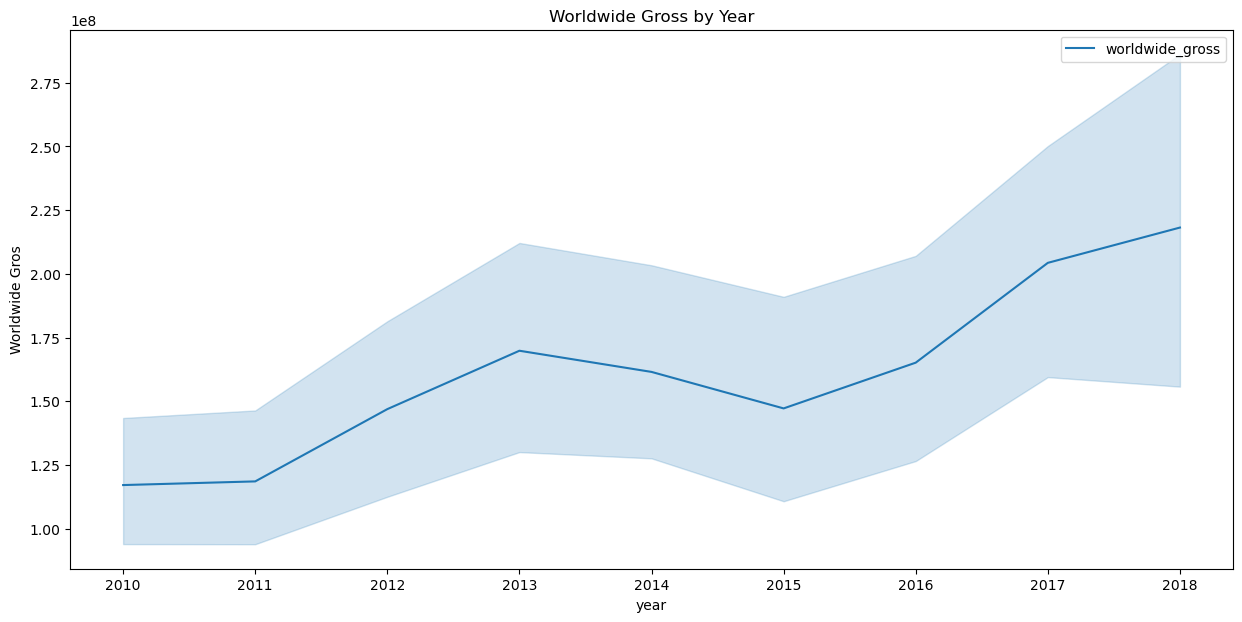

In [16]:
#lineplot showing the worldwide gross income by year
fig, ax =plt.subplots(figsize=(15,7))
sns.lineplot(data=df, x="year", y="worldwide_gross", ax=ax, label="worldwide_gross")
ax.set_title("Worldwide Gross by Year")
plt.savefig("./images/worldwidegross.png", dpi=300)
ax.set_ylabel("Worldwide Gros");

Worldwide gross income has been increasing since 2015

## Evaluation
From my model, the results are as follows:
* Worldwide gross income has been increasing since 2015
* There is a positive linear relationship between profits and production budget
* The "vote_count" column has some outliers
* Most movies are averagely voted at around 6.5 
* Most movies produced are for genre_id "[18]"
* Most movies are produced in English language
***
Introduction of theatres and streaming video companies such as Netflix are probably the reasons for increase in worldwide gross income. Currently, production of a high quality movie does not come cheap and even after its production some good money must be spent in marketing and advertising. Therefore, movie producers should consider a reasonable production budget for them to realize good profits. The average vote is around 6.5 which shows how people appreciate movies of almost all genres and that every kind of movie has its audience. I am confident with this model because it focuses even on the minor details like original language which will help Microsoft decide on the language of their movies. However, language does not determine how movies are rated probably because of captions and people watching movies with languages they understand.

## Conclusions
In conclusion, this model presents a major opportunity for Microsoft to invest in the movie production business and tap into the growing demand for original video content leading to increased worldwide gross income since 2015. Microsoft can make informed decisions about the types of movies to produce, ensuring the success of their new movie studio. Since more than 90% of movies in my dataset are in English, Microsoft should focus on producing English movies. Microsoft should also invest heavily on production to realize good profits. Finally, there is a list of top 10 movie production studio in my project that Microsoft can consider to collaborate with or benchmark from.
***
One of the main limitations in my project is that my data missed the genre columns but instead had genre ids and that's why I did not focus much on genre. However, from my shallow analysis on genre_ids, Microsoft should focus on producing movies of genre_id 18. The issue is that my data could not define the genre's name. Therefore, there's need for genres in future work and more research should be done on how those genres relate with their specific worldwide gross income. Apart from theatrical earnings, studios can earn revenue through streaming services, television rights, home entertainment sales and rentals,and product placement fees. data should be collected on these sources of income and compare them to the income from the theatre earnings.